In [63]:
from os import listdir, path
from os.path import isfile, join
import re
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def read_data(file_name):
    x_threads = []
    x_size = []
    y_average = []
    with open(file_name, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            threads_number = int(row['threads_number'])
            file_size = float(row['size'])
            average = float(row['collect_time'])
            x_threads.append(int(threads_number))
            x_size.append(int(file_size))
            y_average.append(float(average))
    return x_threads, x_size, y_average


In [64]:
x_threads, x_size, y_average = read_data('results.csv')

import pandas as pd

df = pd.DataFrame({'threads': x_threads, 'size': x_size, 'time': y_average})
df = df.sort_values(['size', 'threads'])
with pd.option_context('display.max_rows', 100, 'display.max_columns', 5):
    print(df)


    size  threads   time
25    12      100    8.0
0     12      250   23.0
26    23      100   11.5
1     23      250   44.5
27    35      100   19.0
2     35      250   78.5
3     35      500  116.0
28    46      100   23.5
4     46      250   91.5
5     46      500  160.5
29    69      100   49.0
6     69      250  160.5
7     69      500  228.5
30   103      100  144.0
8    103      250  247.0
18   138       25   24.0
17   138       50   76.0
20   138      100   88.0
31   138      100  246.0
12   138      150  103.5
22   138      200  263.5
9    138      250  350.0
10   138      250  341.0
23   138      300  682.0
16   138      350  724.0
24   138      350  756.0
13   138      400  299.5
21   138      400  538.0
19   138      500  502.0
11   138      550  444.5
15   138      600  659.5
14   138      700  834.0


In [65]:
def func(X, a, b):
    threads, size = X
    return a * threads * b * size

In [66]:
popt, pcov = curve_fit(func, (x_size, x_threads), y_average)
popt

array([-0.01363532, -0.65245422])

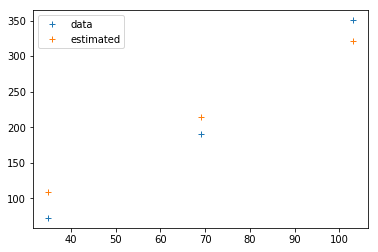

In [67]:
x_threads_test, x_size_test, y_average_test = read_data('test.csv')

estimated_result = [func((x, y), popt[0], popt[1]) for x, y in zip(x_size_test, x_threads_test)]

plt.plot(x_size_test, y_average_test, '+', label='data')
plt.plot(x_size_test, estimated_result, '+', label='estimated')

plt.legend()
plt.show()
